# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>John Amakata</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Read csv
data = pd.read_csv('winequality.csv')
data.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
print(data.info())
# Analyse missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

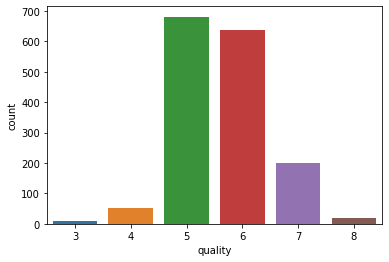

In [5]:
# Our label Distribution (countplot)
sns.countplot(data['quality'])

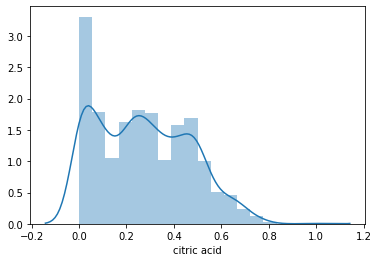

In [7]:
# Example EDA (distplot)
sns.distplot(data['citric acid'])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [10]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

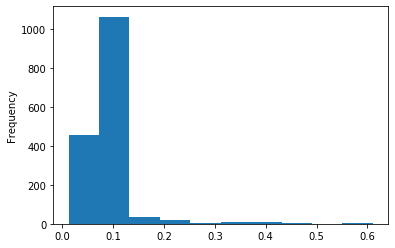

In [21]:
(data['chlorides']).plot(kind = 'hist')

In [34]:
X = data.drop(['quality'], axis = 1)
y = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [35]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split, cross_validate
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 200)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier 
import xgboost as xgb
from sklearn.linear_model import LogisticRegression


dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ad_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()
lr_model = LogisticRegression()
xgb_model = xgb.XGBClassifier()

In [143]:
def evaluation(model, x1, y1, x2, y2):
    from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
    m = model.fit(x1, y1)
    train_pred = m.predict(x1)
    test_pred = m.predict(x2)
    print("Train accuracy score:{}".format(accuracy_score(y1,train_pred)))
    print("Test accuracy score:{}".format(accuracy_score(y2, test_pred)))
    print("--" * 20)
    print("Train f1 score:{}".format(f1_score(y1,train_pred)))
    print("Test f1 score:{}".format(f1_score(y2, test_pred)))
    print("--" * 20)
    print("Train recall score:{}".format(recall_score(y1,train_pred)))
    print("Test recall score:{}".format(recall_score(y2, test_pred)))
    print("--" * 20)
    print("Train precision score:{}".format(precision_score(y1,train_pred)))
    print("Test precision score:{}".format(precision_score(y2, test_pred)))
    
    
    
def cross_validation(model, x1,y1, x2, y2, plot=True):
    cv = cross_validate(model, x1, y1, scoring= 'f1', cv = 5, return_estimator = True)
    print("Mean training f1 score: {}".format(np.mean(cv['test_score'])))
    test_mean_score = []
    for x in cv['estimator']:
        pred = x.predict(x_test)
        score = f1_score(y_test, pred)
        test_mean_score.append(score)
    print("Mean testing f1 score: {}".format(np.mean(test_mean_score)))
    
    if plot:
        from sklearn.metrics import confusion_matrix
        pred = cv["estimator"][0].predict(x2)
        cm = confusion_matrix(y2, pred)
        plt.figure(figsize=(12, 8))
        ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
        ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
        ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
        ax.set_xlabel('Predicted Labels',fontsize = 15)
        ax.set_ylabel('True Labels',fontsize = 15)
        plt.show()

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

### XGBOOST

In [147]:
evaluation(xgb_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

Train accuracy score:0.9472743521000894
Test accuracy score:0.90625
----------------------------------------
Train f1 score:0.7972508591065292
Test f1 score:0.5263157894736843
----------------------------------------
Train recall score:0.703030303030303
Test recall score:0.4807692307692308
----------------------------------------
Train precision score:0.9206349206349206
Test precision score:0.5813953488372093


Mean training f1 score: 0.4631112678171502
Mean testing f1 score: 0.4962615629984051


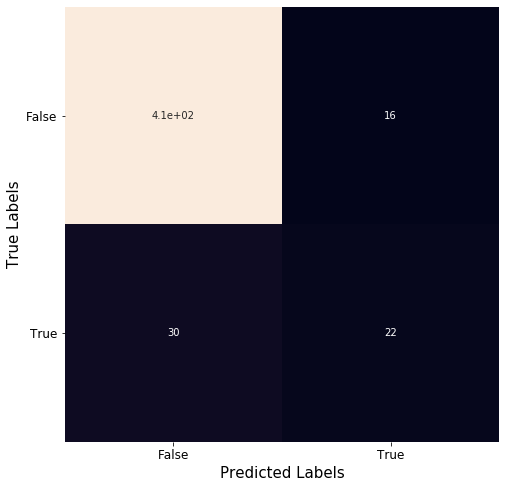

In [148]:
cross_validation(xgb_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

### Random Forest

In [149]:
evaluation(rf_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

Train accuracy score:1.0
Test accuracy score:0.9333333333333333
----------------------------------------
Train f1 score:1.0
Test f1 score:0.6734693877551019
----------------------------------------
Train recall score:1.0
Test recall score:0.6346153846153846
----------------------------------------
Train precision score:1.0
Test precision score:0.717391304347826


Mean training f1 score: 0.538264677237636
Mean testing f1 score: 0.6122658938384724


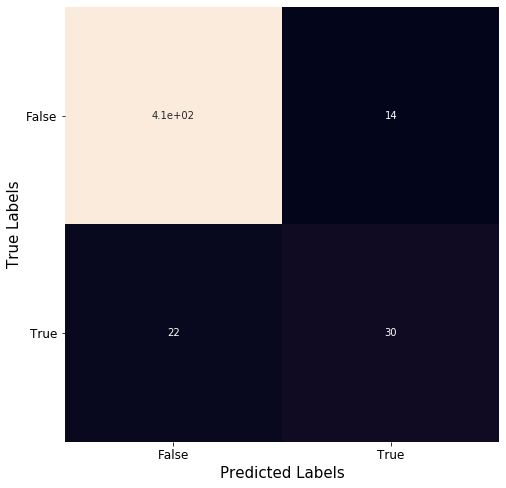

In [150]:
cross_validation(rf_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

### Gradient Boosting

In [152]:
evaluation(gb_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

Train accuracy score:0.9597855227882037
Test accuracy score:0.9166666666666666
----------------------------------------
Train f1 score:0.8484848484848485
Test f1 score:0.5833333333333334
----------------------------------------
Train recall score:0.7636363636363637
Test recall score:0.5384615384615384
----------------------------------------
Train precision score:0.9545454545454546
Test precision score:0.6363636363636364


Mean training f1 score: 0.5006246599514742
Mean testing f1 score: 0.5770123844745678


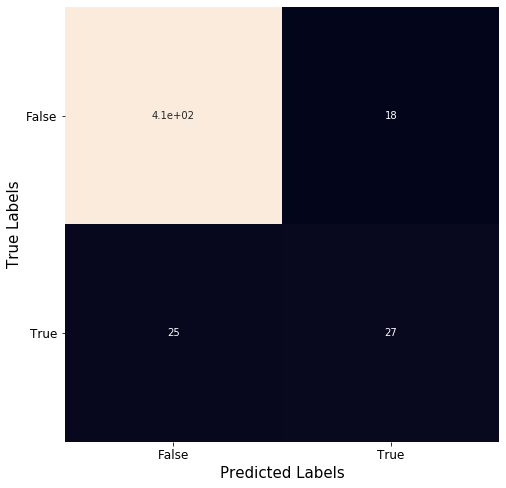

In [151]:
cross_validation(gb_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

### Logistic Regression

In [154]:
import warnings
warnings.filterwarnings('ignore')
evaluation(lr_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

Train accuracy score:0.8731009830205541
Test accuracy score:0.8958333333333334
----------------------------------------
Train f1 score:0.39316239316239315
Test f1 score:0.37499999999999994
----------------------------------------
Train recall score:0.2787878787878788
Test recall score:0.28846153846153844
----------------------------------------
Train precision score:0.6666666666666666
Test precision score:0.5357142857142857


Mean training f1 score: 0.49354507973788425
Mean testing f1 score: 0.5748603698225531


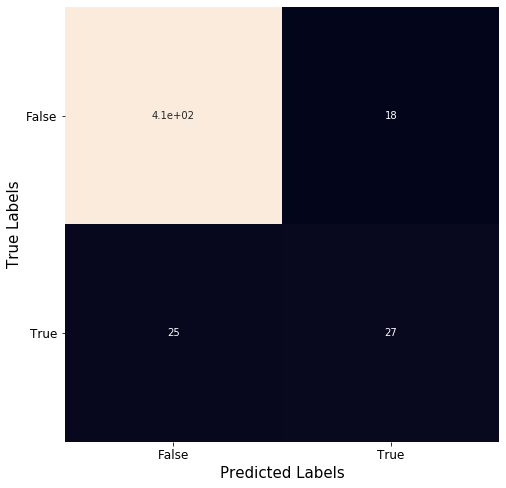

In [155]:
cross_validation(gb_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

# Ada Boost

In [156]:
evaluation(ad_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

Train accuracy score:0.903485254691689
Test accuracy score:0.8958333333333334
----------------------------------------
Train f1 score:0.6301369863013699
Test f1 score:0.4680851063829788
----------------------------------------
Train recall score:0.5575757575757576
Test recall score:0.4230769230769231
----------------------------------------
Train precision score:0.7244094488188977
Test precision score:0.5238095238095238


Mean training f1 score: 0.4608690531436527
Mean testing f1 score: 0.4709391030028815


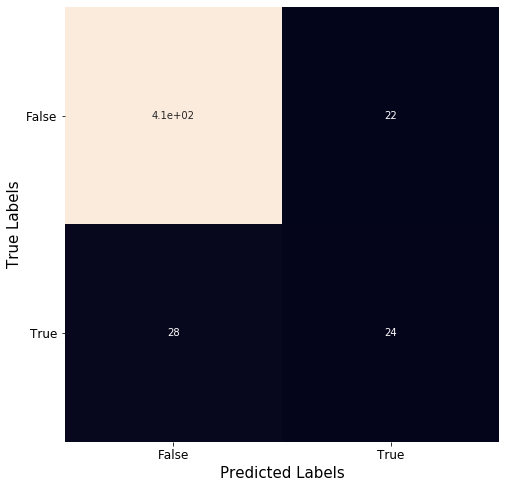

In [157]:
cross_validation(ad_model, x1 = x_train, y1 = y_train, x2 = x_test, y2 = y_test)

### Comment:

- From the above models Random Forest appears to be the best model considering the f1_score, it has a best score on the test data

- For further investigation model parameters can be tuned for model improvement.